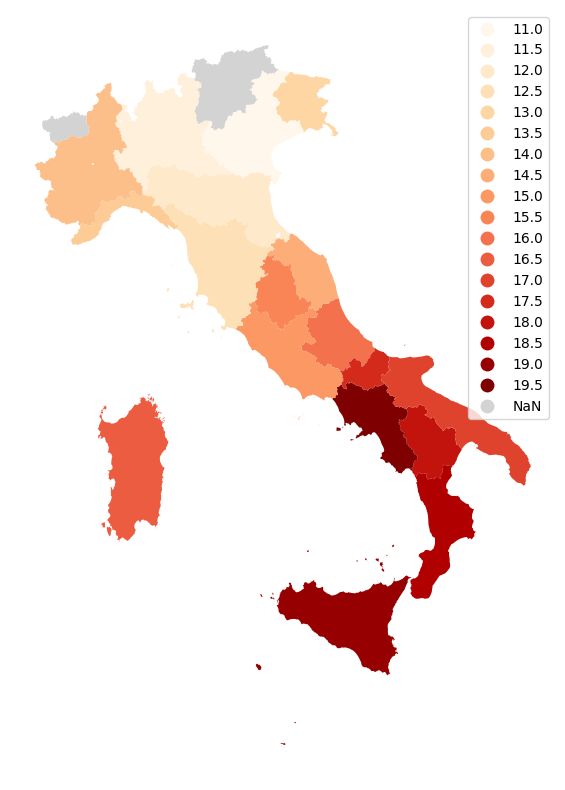

In [77]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

regions = ['Trentino Alto Adige', "Valle d'Aosta", 'Veneto', 'Lombardia', 'Emilia-Romagna', 'Toscana', 'Friuli-Venezia Giulia', 'Liguria', 'Piemonte', 'Marche', 'Lazio', 'Umbria', 'Abruzzo', 'Sardegna', 'Puglia', 'Molise', 'Basilicata', 'Calabria', 'Sicilia', 'Campania']
df = pd.DataFrame([regions,[10+(i/2) for i in range(20)]]).transpose()
df.columns = ['region','quantity']

#Download a geojson of the region geometries
gdf = gpd.read_file(filename=r'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson')
gdf = gdf.dissolve(by='reg_name') #The geojson is to detailed, dissolve boundaries by reg_name attribute
gdf = gdf.reset_index()

#gdf.reg_name[~gdf.reg_name.isin(regions)] Two regions are missing in your df
#16    Trentino-Alto Adige/Südtirol
#18    Valle d'Aosta/Vallée d'Aoste

gdf = pd.merge(left=gdf, right=df, how='left', left_on='reg_name', right_on='region')

ax = gdf.plot(
    column="quantity",
    legend=True,
    figsize=(15, 10),
    cmap='OrRd',
    missing_kwds={'color': 'lightgrey'});

ax.set_axis_off();

In [78]:
data = pd.read_csv("../data/ISTAT_Italian_Excursion_2014_2022.csv")

regione_mapping = {
    10: 'Piemonte',
    20: "Valle d'Aosta",
    30: 'Lombardia',
    40: 'Trentino A.Adige',
    50: 'Veneto',
    60: 'Friuli-Venezia Giulia',
    70: 'Liguria',
    80: 'Emilia-Romagna',
    90: 'Toscana',
    100: 'Umbria',
    110: 'Marche',
    120: 'Lazio',
    130: 'Abruzzo',
    140: 'Molise',
    150: 'Campania',
    160: 'Puglia',
    170: 'Basilicata',
    180: 'Calabria',
    190: 'Sicilia',
    200: 'Sardegna'
}

data['Regione'] = data['reg'].map(regione_mapping)

conteggio = data['Regione'].value_counts().reset_index()

conteggio

,Regione,count
0,Veneto,4949
1,Trentino A.Adige,3577
2,Lombardia,3495
3,Emilia-Romagna,3432
4,Friuli-Venezia Giulia,3207
5,Toscana,3011
6,Campania,2601
7,Liguria,1902
8,Lazio,1878
9,Piemonte,1612


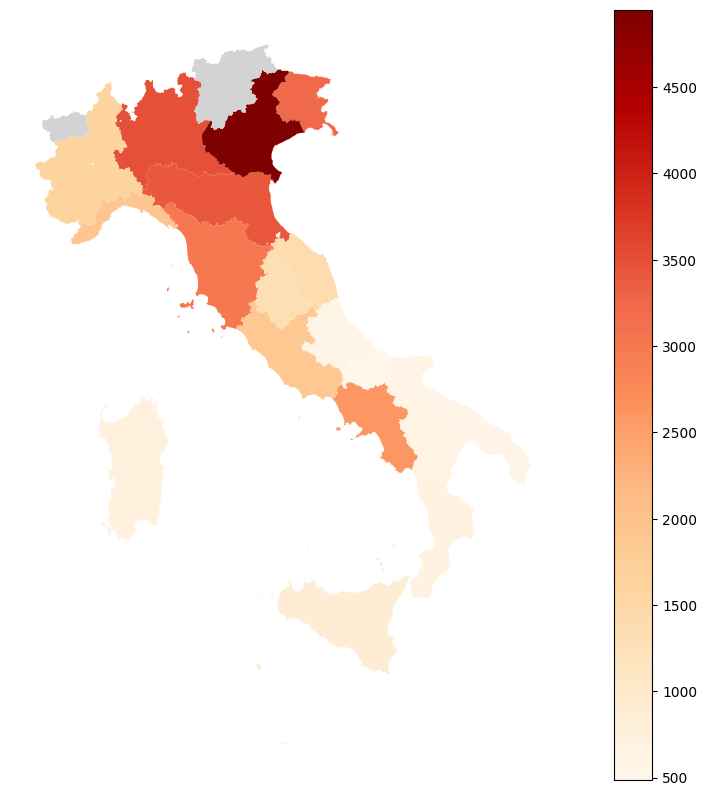

In [79]:

# Download del file GeoJSON delle geometrie delle regioni italiane
url_geojson = 'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson'
gdf = gpd.read_file(url_geojson)

# Dissoluzione delle geometrie per reg_name
gdf_dissolved = gdf.dissolve(by='reg_name')

# Reset dell'indice per ottenere un DataFrame
gdf_dissolved = gdf_dissolved.reset_index()

# Unione dei DataFrame
gdf_merged = pd.merge(left=gdf_dissolved, right=conteggio, how='left', left_on='reg_name', right_on='Regione')

# Plot della mappa
ax = gdf_merged.plot(column='count', cmap='OrRd', figsize=(15, 10), legend=True, missing_kwds={'color': 'lightgrey'})

# Personalizzazione dell'asse
ax.set_axis_off()

In [86]:
'''
Mi servono 3 dati:
1) il conteggio in ciascuna regione (o provincia)
2) codice della regione (o provincia)
3) il mese e l'anno il record è andato in escursione

'''
import numpy as np

data = {
    "Cod_provincia": [i for i in range(1, 21)],
    "count": np.random.randint(1, 5000, size=20)
}

conteggio = pd.DataFrame(data)

fig = px.choropleth(
  conteggio,
  geojson='https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson',
  locations='Cod_provincia',
  color='count',
  color_continuous_scale='Reds',
  featureidkey='properties.reg_istat_code_num',
  #animation_frame='Date',
  range_color=(0, max(conteggio['count']))
  )

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()



In [87]:
## PROVINCE
data = {
    "Cod_provincia": [i for i in range(1, 111)],
    "count": np.random.randint(1, 5000, size=110)
}

conteggio = pd.DataFrame(data)

fig = px.choropleth(
  conteggio,
  geojson='https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson',
  locations='Cod_provincia',
  color='count',
  color_continuous_scale='Reds',
  featureidkey='properties.prov_istat_code_num',
  #animation_frame='Date',
  range_color=(0, max(conteggio['count']))
  )

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()
